# Attempt to Prep Model Output for Analysis

In [48]:
import rioxarray # for the extension to load
import xarray
import rasterio
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [16]:
xds = xarray.open_dataset("../SnowHydro/data/Model_Output/WAOL_1K/N48_0W125_0_agg_16_SWE_SCA_POST_WY2015_16.nc")

In [18]:
xds

<xarray.Dataset>
Dimensions:    (Day: 366, Latitude: 225, Longitude: 225, Stats: 5)
Coordinates:
  * Latitude   (Latitude) float32 49.0 48.99 48.99 48.98 ... 48.01 48.01 48.0
  * Longitude  (Longitude) float32 -125.0 -125.0 -125.0 ... -124.0 -124.0 -124.0
Dimensions without coordinates: Day, Stats
Data variables:
    SWE_Post   (Day, Stats, Longitude, Latitude) float32 ...
    SCA_Post   (Day, Stats, Longitude, Latitude) float32 ...

(array([1.2109709e+07, 3.2059000e+04, 5.0910000e+03, 2.8790000e+03,
        1.8960000e+03, 9.8500000e+02, 2.5200000e+02, 7.0000000e+01,
        2.9000000e+01, 6.0000000e+01]),
 array([0.        , 0.12384   , 0.24768   , 0.37151998, 0.49536   ,
        0.6192    , 0.74303997, 0.86688   , 0.99072   , 1.11456   ,
        1.2384    ], dtype=float32),
 <BarContainer object of 10 artists>)

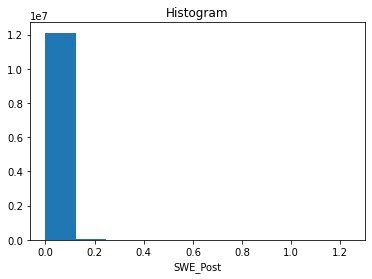

In [29]:
xds.SWE_Post.where(xds.SWE_Post!=xds.SWE_Post.rio.nodata).isel(Stats=1).plot()

(array([6.0621241e+07, 1.0567600e+05, 1.9496000e+04, 7.8300000e+03,
        4.4830000e+03, 2.7040000e+03, 1.7740000e+03, 1.1830000e+03,
        5.3600000e+02, 2.2700000e+02]),
 array([0.     , 0.25962, 0.51924, 0.77886, 1.03848, 1.2981 , 1.55772,
        1.81734, 2.07696, 2.33658, 2.5962 ], dtype=float32),
 <BarContainer object of 10 artists>)

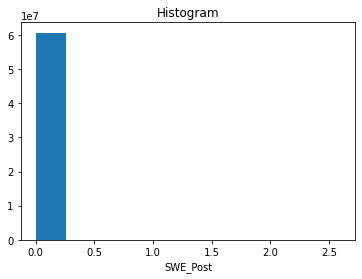

In [49]:
xds.SWE_Post.plot()

In [19]:
xds.rio.set_spatial_dims('Longitude', 'Latitude')

<xarray.Dataset>
Dimensions:    (Day: 366, Latitude: 225, Longitude: 225, Stats: 5)
Coordinates:
  * Latitude   (Latitude) float32 49.0 48.99 48.99 48.98 ... 48.01 48.01 48.0
  * Longitude  (Longitude) float32 -125.0 -125.0 -125.0 ... -124.0 -124.0 -124.0
Dimensions without coordinates: Day, Stats
Data variables:
    SWE_Post   (Day, Stats, Longitude, Latitude) float32 ...
    SCA_Post   (Day, Stats, Longitude, Latitude) float32 ...

In [32]:
xds.rio.set_crs('EPSG:4326')

<xarray.Dataset>
Dimensions:    (Day: 366, Latitude: 225, Longitude: 225, Stats: 5)
Coordinates:
  * Latitude   (Latitude) float32 49.0 48.99 48.99 48.98 ... 48.01 48.01 48.0
  * Longitude  (Longitude) float32 -125.0 -125.0 -125.0 ... -124.0 -124.0 -124.0
Dimensions without coordinates: Day, Stats
Data variables:
    SWE_Post   (Day, Stats, Longitude, Latitude) float32 nan nan 0.0 ... 0.0 0.0
    SCA_Post   (Day, Stats, Longitude, Latitude) float32 nan nan 0.0 ... 0.0 0.0

In [22]:
xds.rio.crs

CRS.from_epsg(4326)

In [15]:
xds_utm = xds.rio.reproject("EPSG:32610")

MissingCRS: CRS not found. Please set the CRS with 'set_crs()' or 'write_crs()'. Data variable: SWE_Post

In [35]:
lat = xds.Latitude
lon = xds.Longitude
swe = xds.SWE_Post

In [36]:
xds.close()

In [40]:
lon, lat = np.meshgrid(lon, lat)

In [41]:
lon_0 = lon.mean()
lat_0 = lat.mean()